<a href="https://colab.research.google.com/github/dipayandas97/Keras_Notebook/blob/master/Deep_AutoEncoder_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers


Using TensorFlow backend.


In [0]:
encoding_dim = 2

input_img = Input(shape=(784,))

#encoded = Dense(128, activation = 'relu',
#               activity_regularizer = regularizers.l1(10e-5))(input_img)

encoded = Dense(128, activation = 'relu')(input_img)
encoded = Dense(64, activation = 'relu')(encoded)
encoded = Dense(32, activation = 'relu')(encoded)
encoded = Dense(16, activation = 'relu')(encoded)
encoded = Dense(8, activation = 'relu')(encoded)
#encoded = Dense(encoding_dim, activation = 'relu')(encoded)

#decoded = Dense(8, activation = 'relu')(encoded)
decoded = Dense(16, activation = 'relu')(encoded)
decoded = Dense(32, activation = 'relu')(decoded)
decoded = Dense(64, activation = 'relu')(decoded)
decoded = Dense(128, activation = 'relu')(decoded)
decoded = Dense(784, activation = 'sigmoid')(decoded)

autoencoder = Model(input_img, decoded)


In [67]:
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])
autoencoder.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_107 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_108 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_109 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_110 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_111 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_112 (Dense)            (None, 16)                144       
__________

In [68]:
autoencoder.layers[6].input_shape

(None, 8)

In [0]:
#encoder =  Model(input_img, encoded)

#encoded_inp = Input(shape=(8,))
#decoding_layers = autoencoder.layers[6:]

#decoder = Model(encoded_inp, decoding_layers[6:](encoded_inp))

In [70]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(X_train,_),(X_test,_) = mnist.load_data()
len(X_train)

60000

In [71]:

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

X_train = X_train.reshape((len(X_train),np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test),np.prod(X_test.shape[1:])))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [72]:
autoencoder.fit(X_train, X_train,
               epochs = 50,
               batch_size = 256,
               shuffle = True,
               validation_data = (X_test, X_test),
               verbose = 2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 7s - loss: 0.4092 - acc: 0.7490 - val_loss: 0.2606 - val_acc: 0.7947
Epoch 2/50
 - 6s - loss: 0.2545 - acc: 0.7959 - val_loss: 0.2546 - val_acc: 0.7945
Epoch 3/50
 - 6s - loss: 0.2520 - acc: 0.7977 - val_loss: 0.2525 - val_acc: 0.7927
Epoch 4/50
 - 6s - loss: 0.2513 - acc: 0.7982 - val_loss: 0.2511 - val_acc: 0.7983
Epoch 5/50
 - 6s - loss: 0.2506 - acc: 0.7985 - val_loss: 0.2508 - val_acc: 0.7936
Epoch 6/50
 - 6s - loss: 0.2497 - acc: 0.7946 - val_loss: 0.2454 - val_acc: 0.7975
Epoch 7/50
 - 6s - loss: 1.1691 - acc: 0.7689 - val_loss: 2.9241 - val_acc: 0.7346
Epoch 8/50
 - 6s - loss: 2.9186 - acc: 0.7353 - val_loss: 2.9241 - val_acc: 0.7346
Epoch 9/50
 - 6s - loss: 2.9186 - acc: 0.7353 - val_loss: 2.9241 - val_acc: 0.7346
Epoch 10/50
 - 6s - loss: 2.9186 - acc: 0.7353 - val_loss: 2.9241 - val_acc: 0.7346
Epoch 11/50
 - 6s - loss: 2.9186 - acc: 0.7353 - val_loss: 2.9241 - val_acc: 0.7346
Epoch 12/50
 - 6s - loss: 2.9186 - 

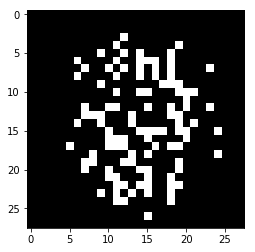

In [73]:

p = autoencoder.predict(X_test)

plt.imshow(p[5000].reshape(28,28))
plt.gray()
plt.show()